In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created
! cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
# - permision for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d nicolaasregnier/pinotnoirgrapes

Dataset URL: https://www.kaggle.com/datasets/nicolaasregnier/pinotnoirgrapes
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 1.57G/1.58G [00:21<00:00, 73.7MB/s]
100% 1.58G/1.58G [00:21<00:00, 78.9MB/s]


In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('pinotnoirgrapes.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [ ]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 35.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# train
!yolo task=detect mode=train model=yolo11n.pt data=/content/dataset_directory/data.yaml epochs=25 imgsz=640

Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset_directory/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

In [ ]:
# validat
! yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/dataset_directory/data.yaml conf=0.5 imgsz=640

Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/dataset_directory/Grapes/Grapes/PinotNoir/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.37s/it]
                   all          9        101      0.907      0.485       0.71      0.552
Speed: 7.0ms preprocess, 338.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# predict
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source=/content/dataset_directory/Grapes/Grapes/PinotNoir/test/images save=True imgsz=640

Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0203_0.jpg: 640x640 8 grapes, 210.0ms
image 2/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0209_0.jpg: 640x640 7 grapes, 202.6ms
image 3/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0211_0.jpg: 640x640 6 grapes, 287.2ms
image 4/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0230_1.jpg: 480x640 6 grapes, 233.9ms
image 5/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0235_0.jpg: 640x640 9 grapes, 319.5ms
image 6/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0237_1.jpg: 512x640 6 grapes, 270.2ms
image 7/10 /content/dataset_directory/Grapes/Grapes/PinotNoir/test/images/IMG_0238_1.jpg: 448x640 6 grapes, 230.3ms
image 8/10 /content/datas

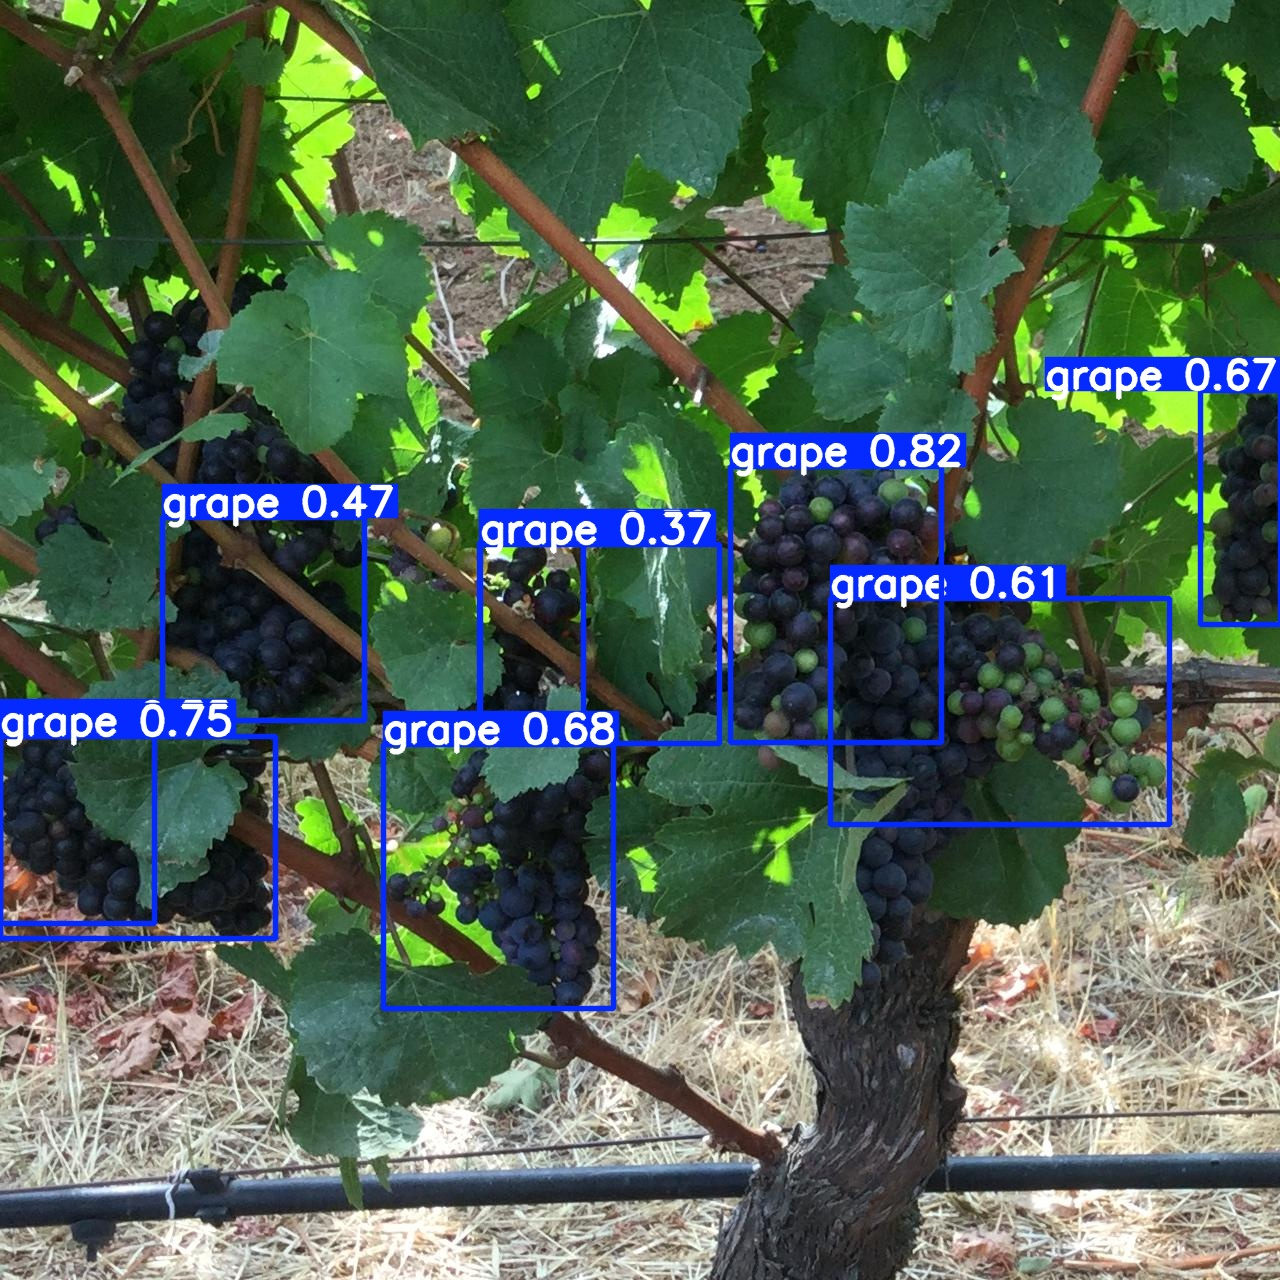

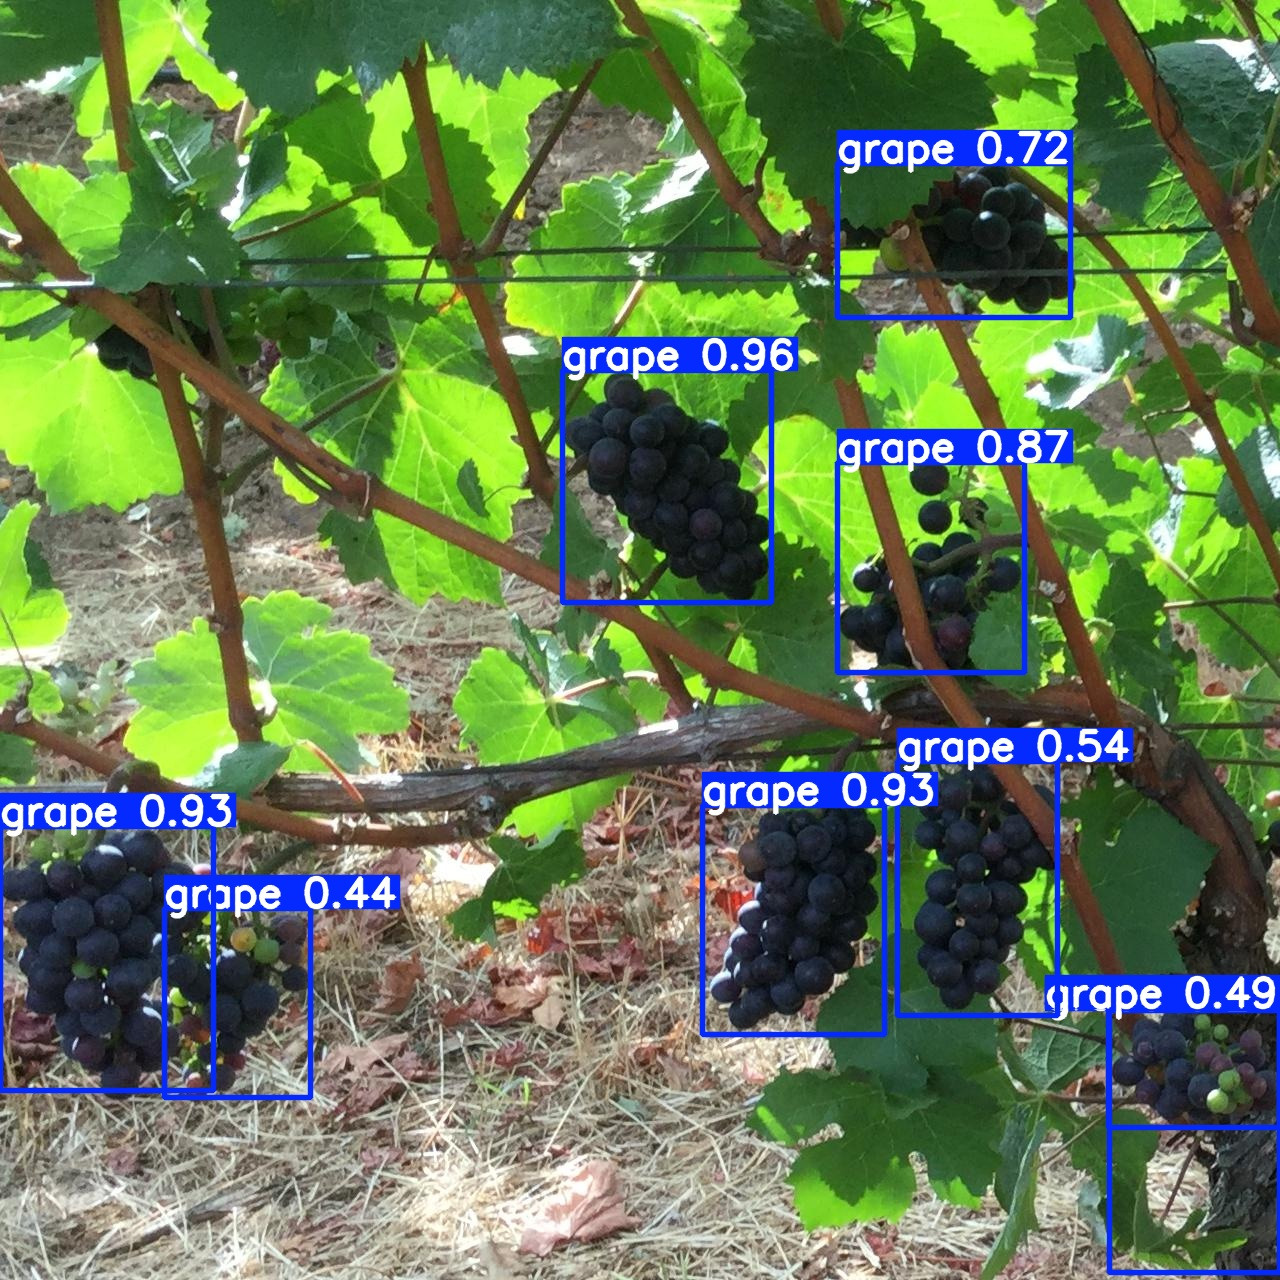

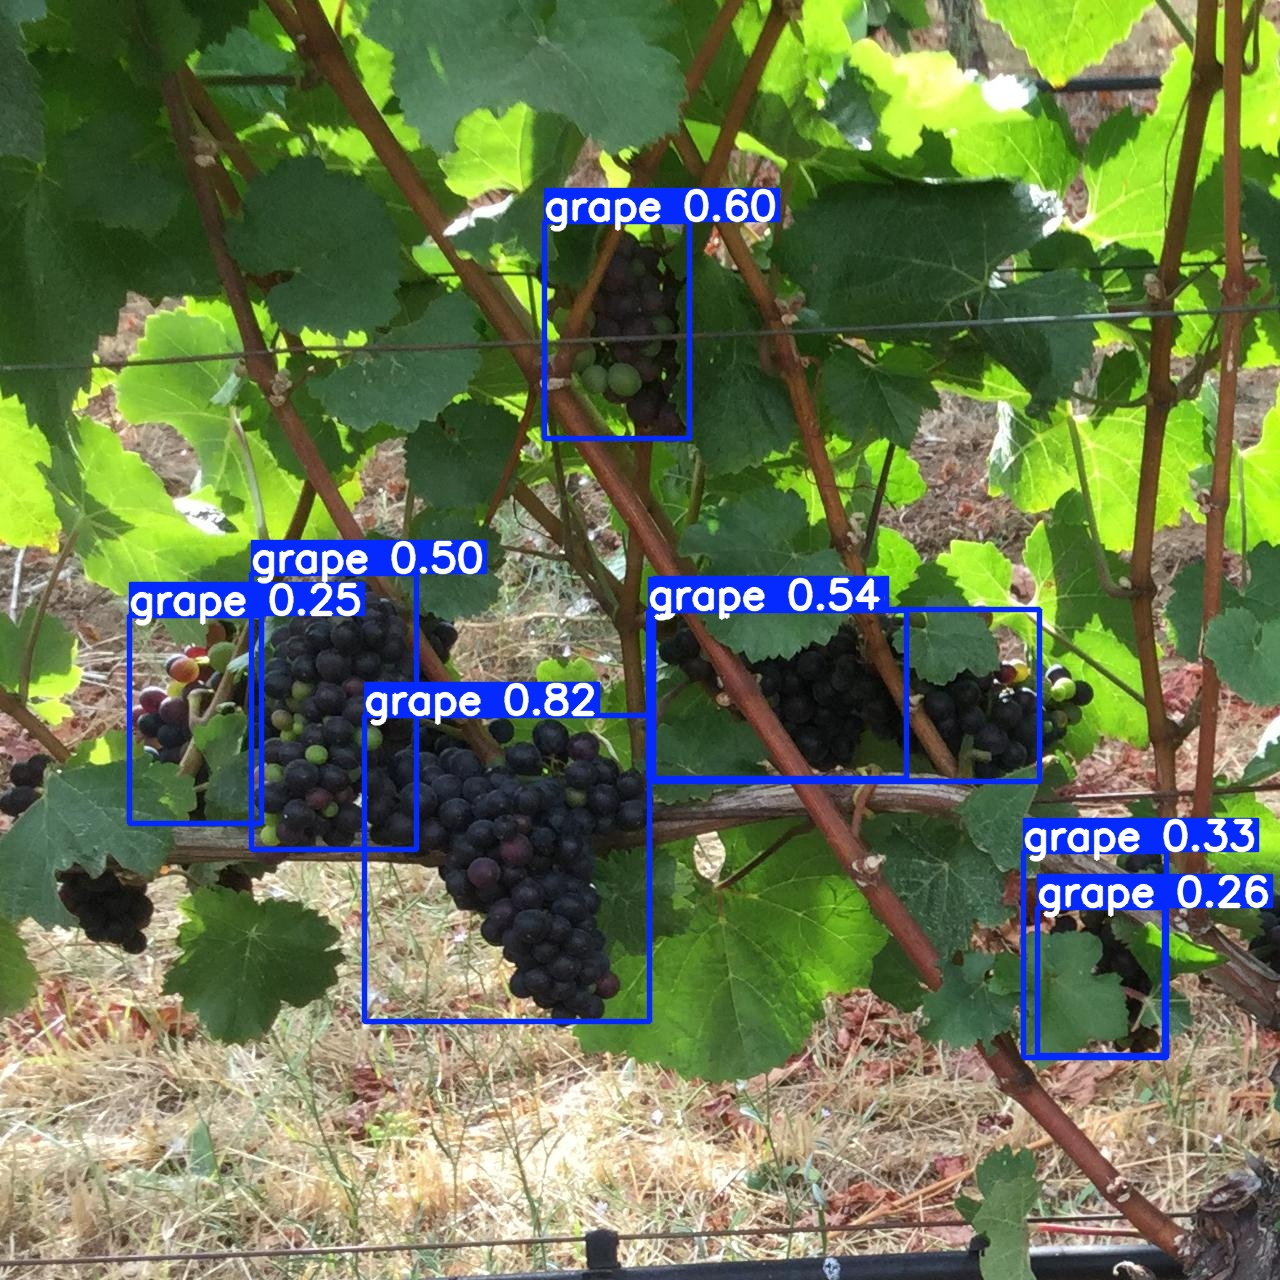

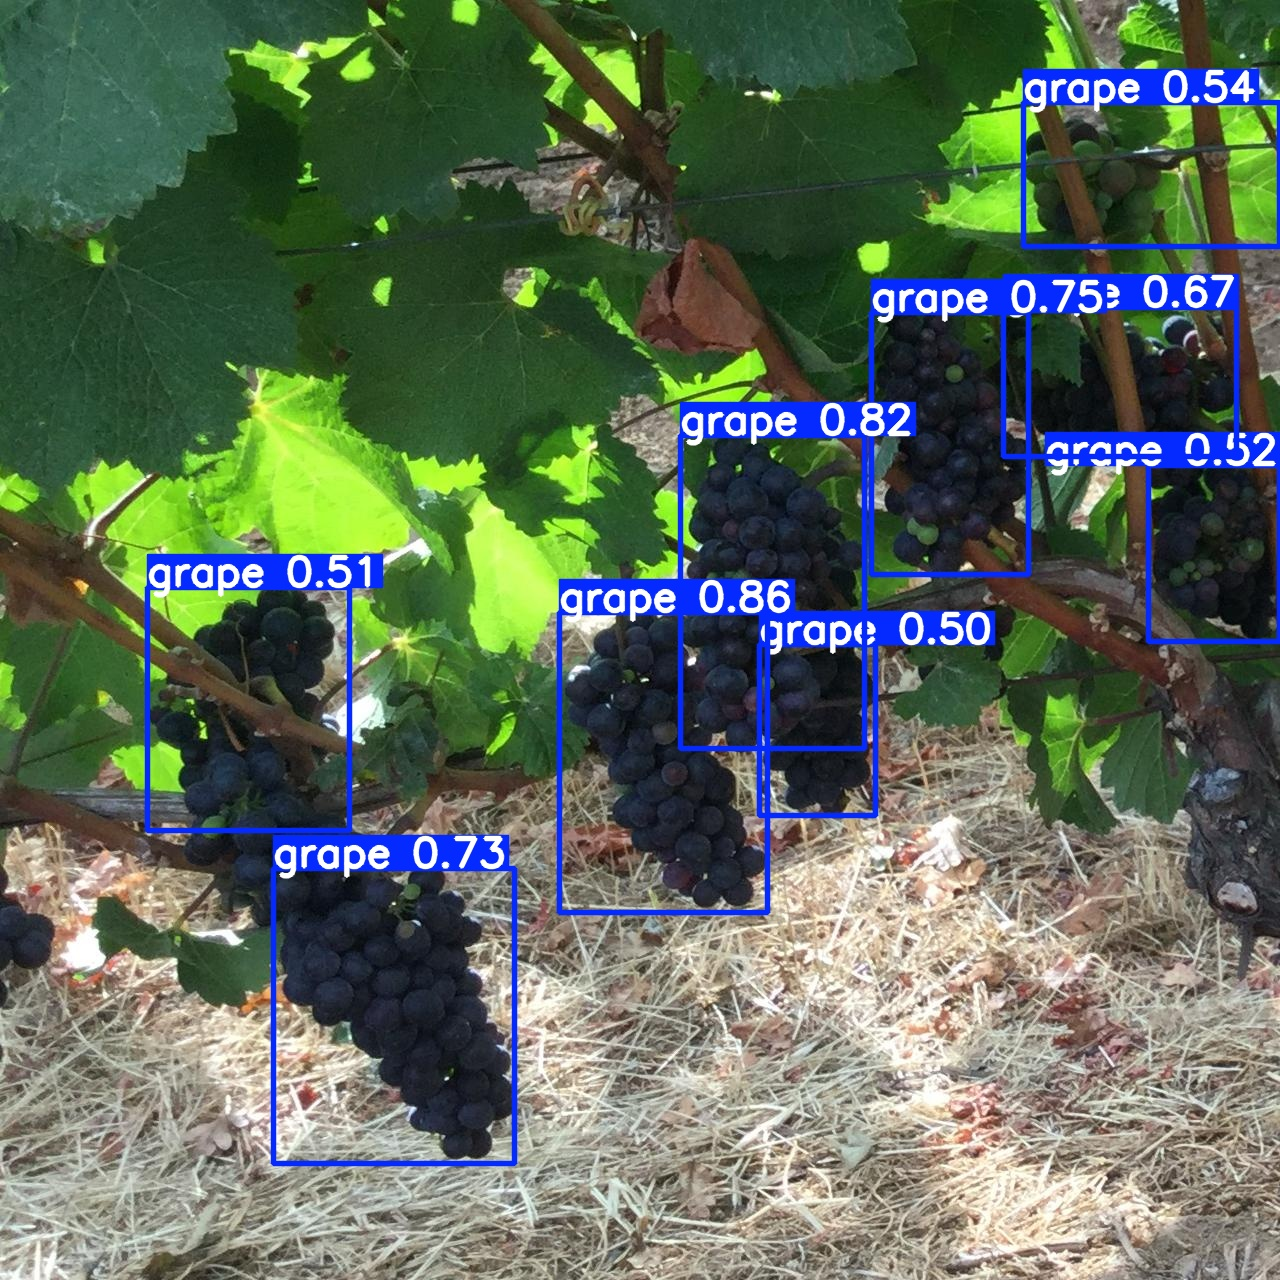

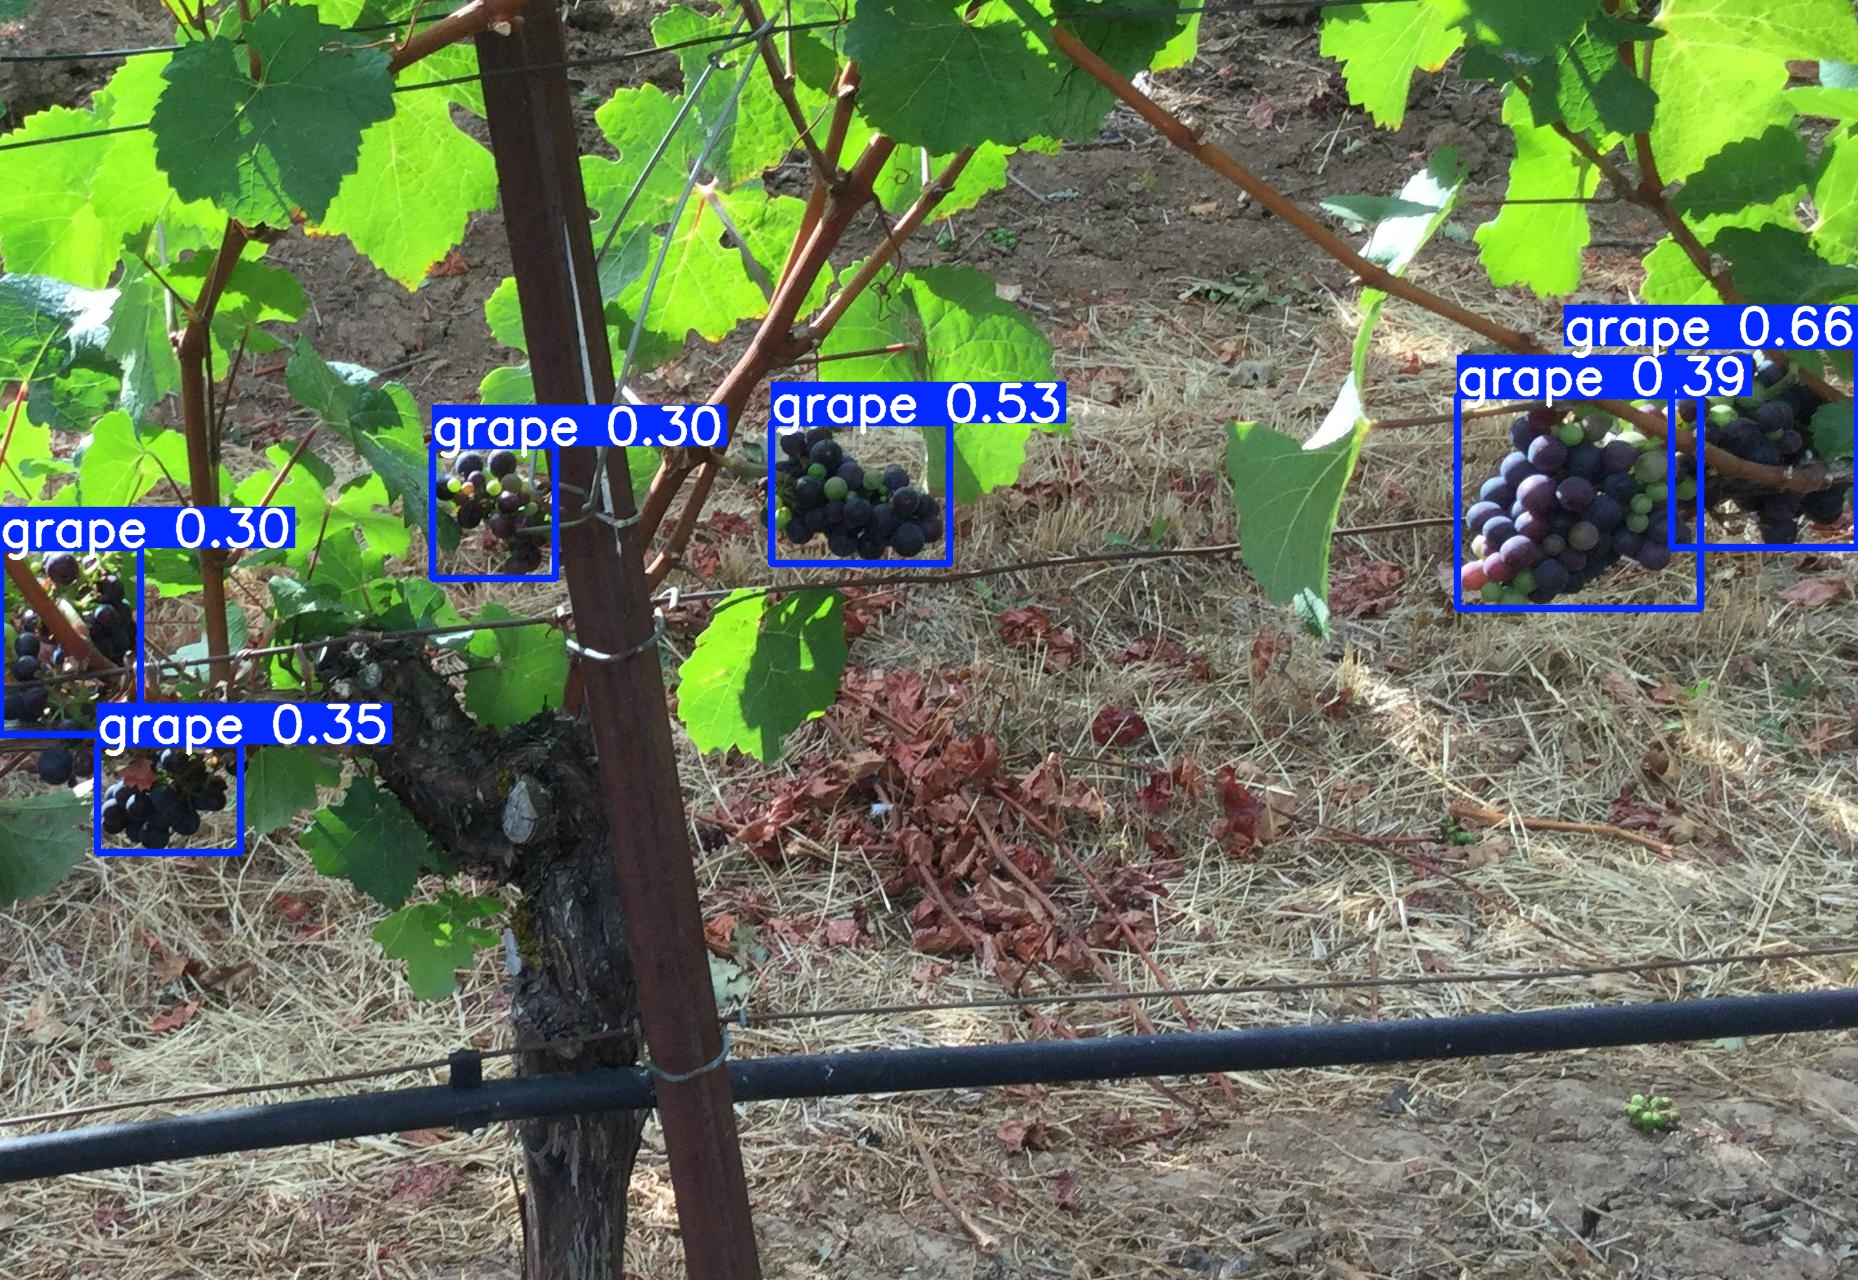

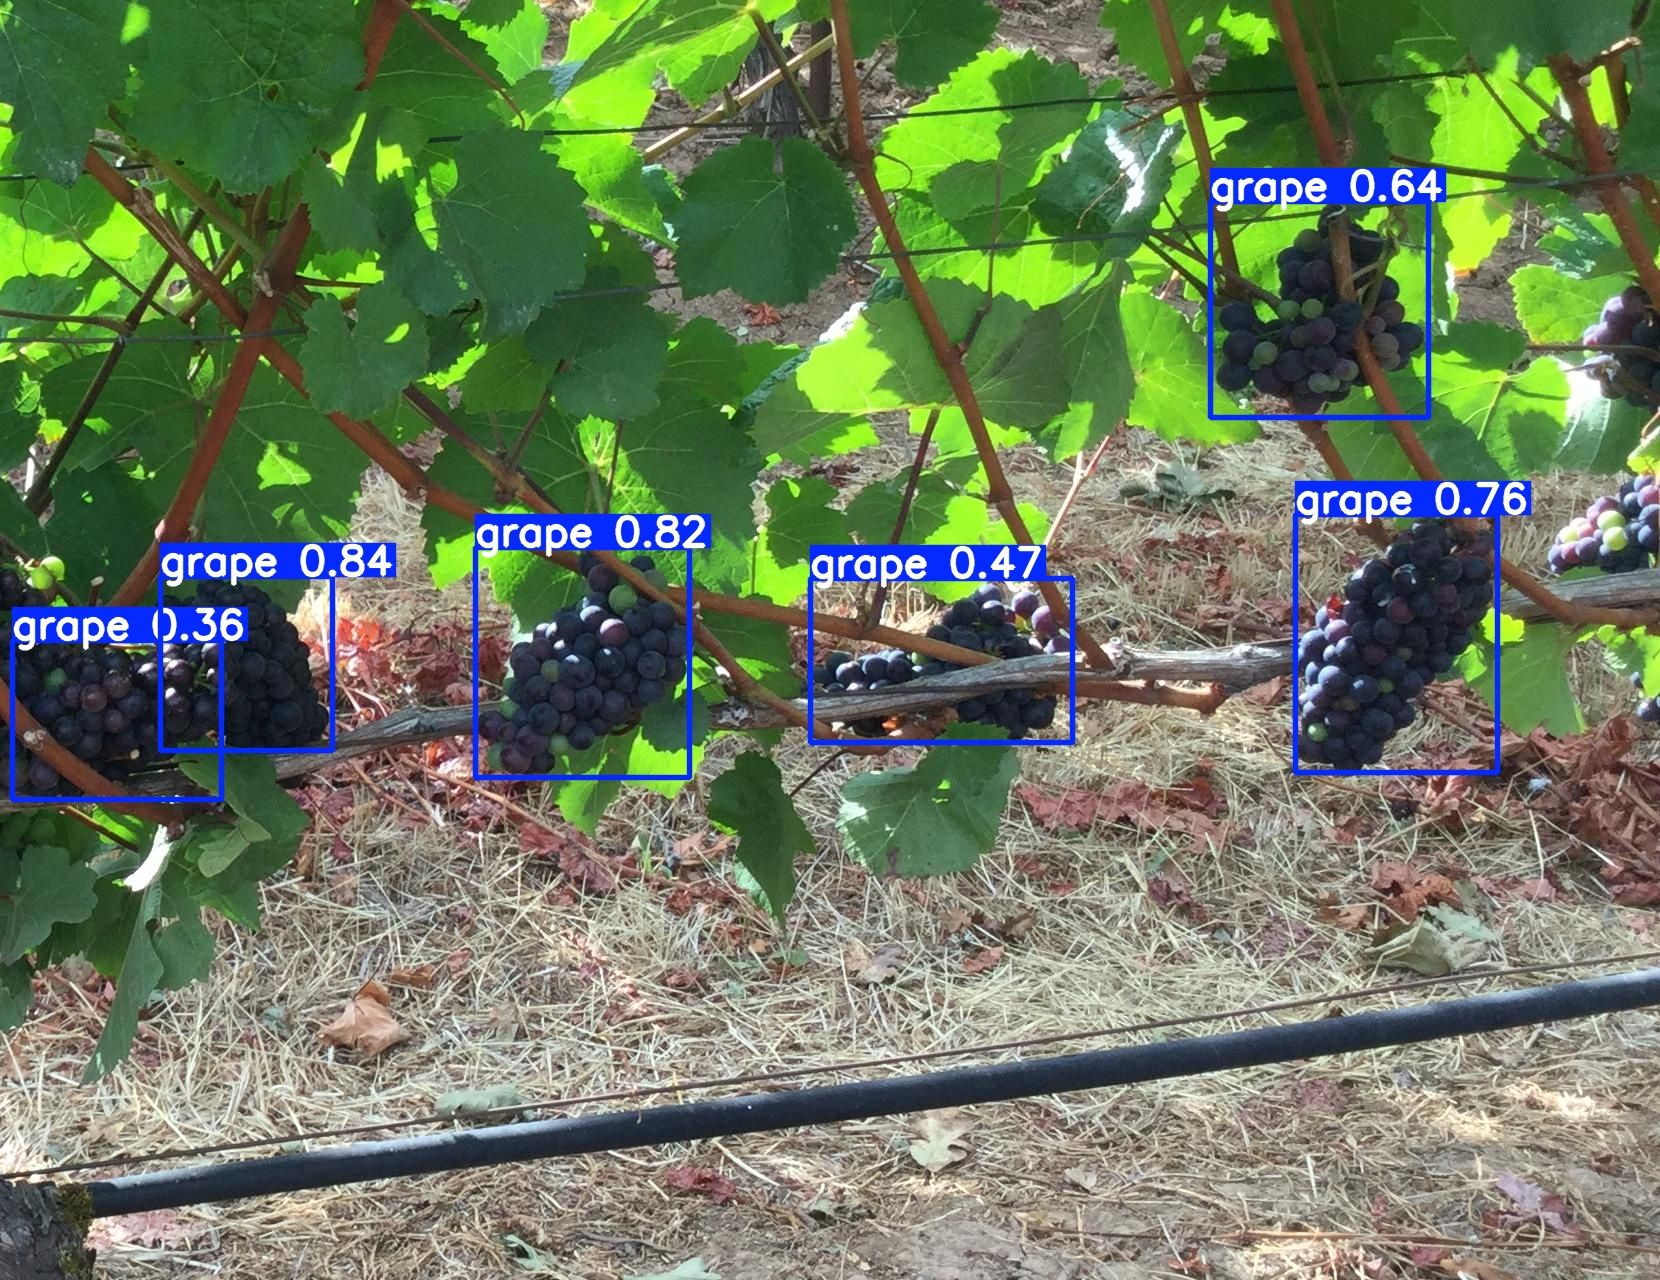

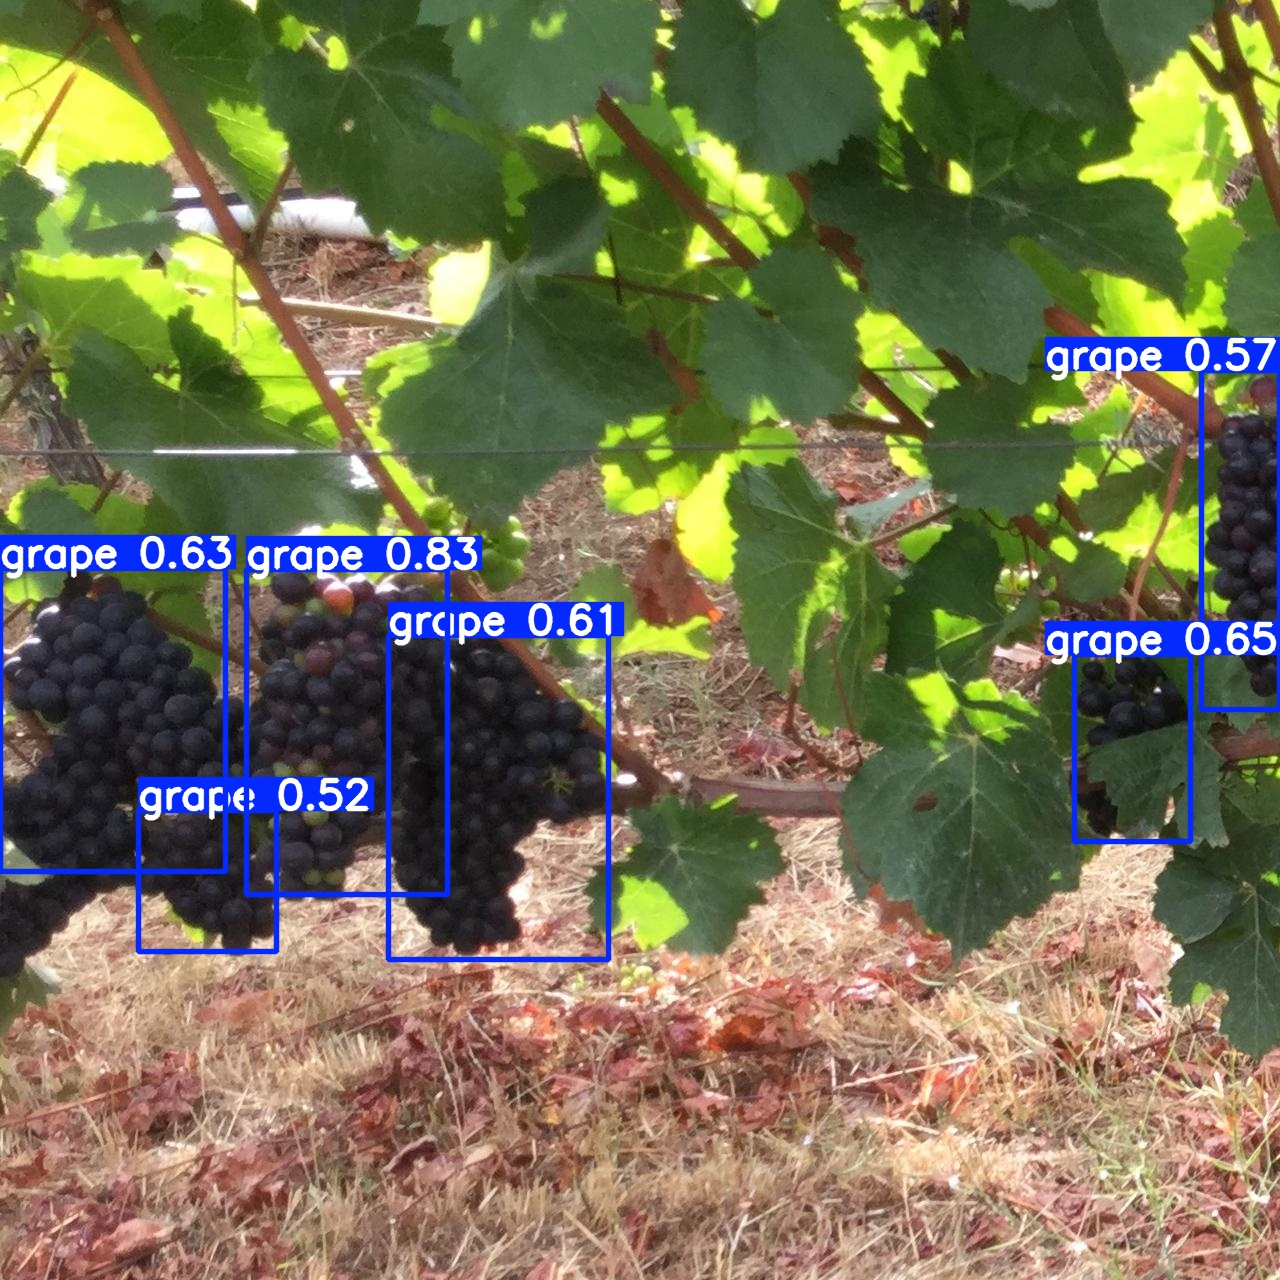

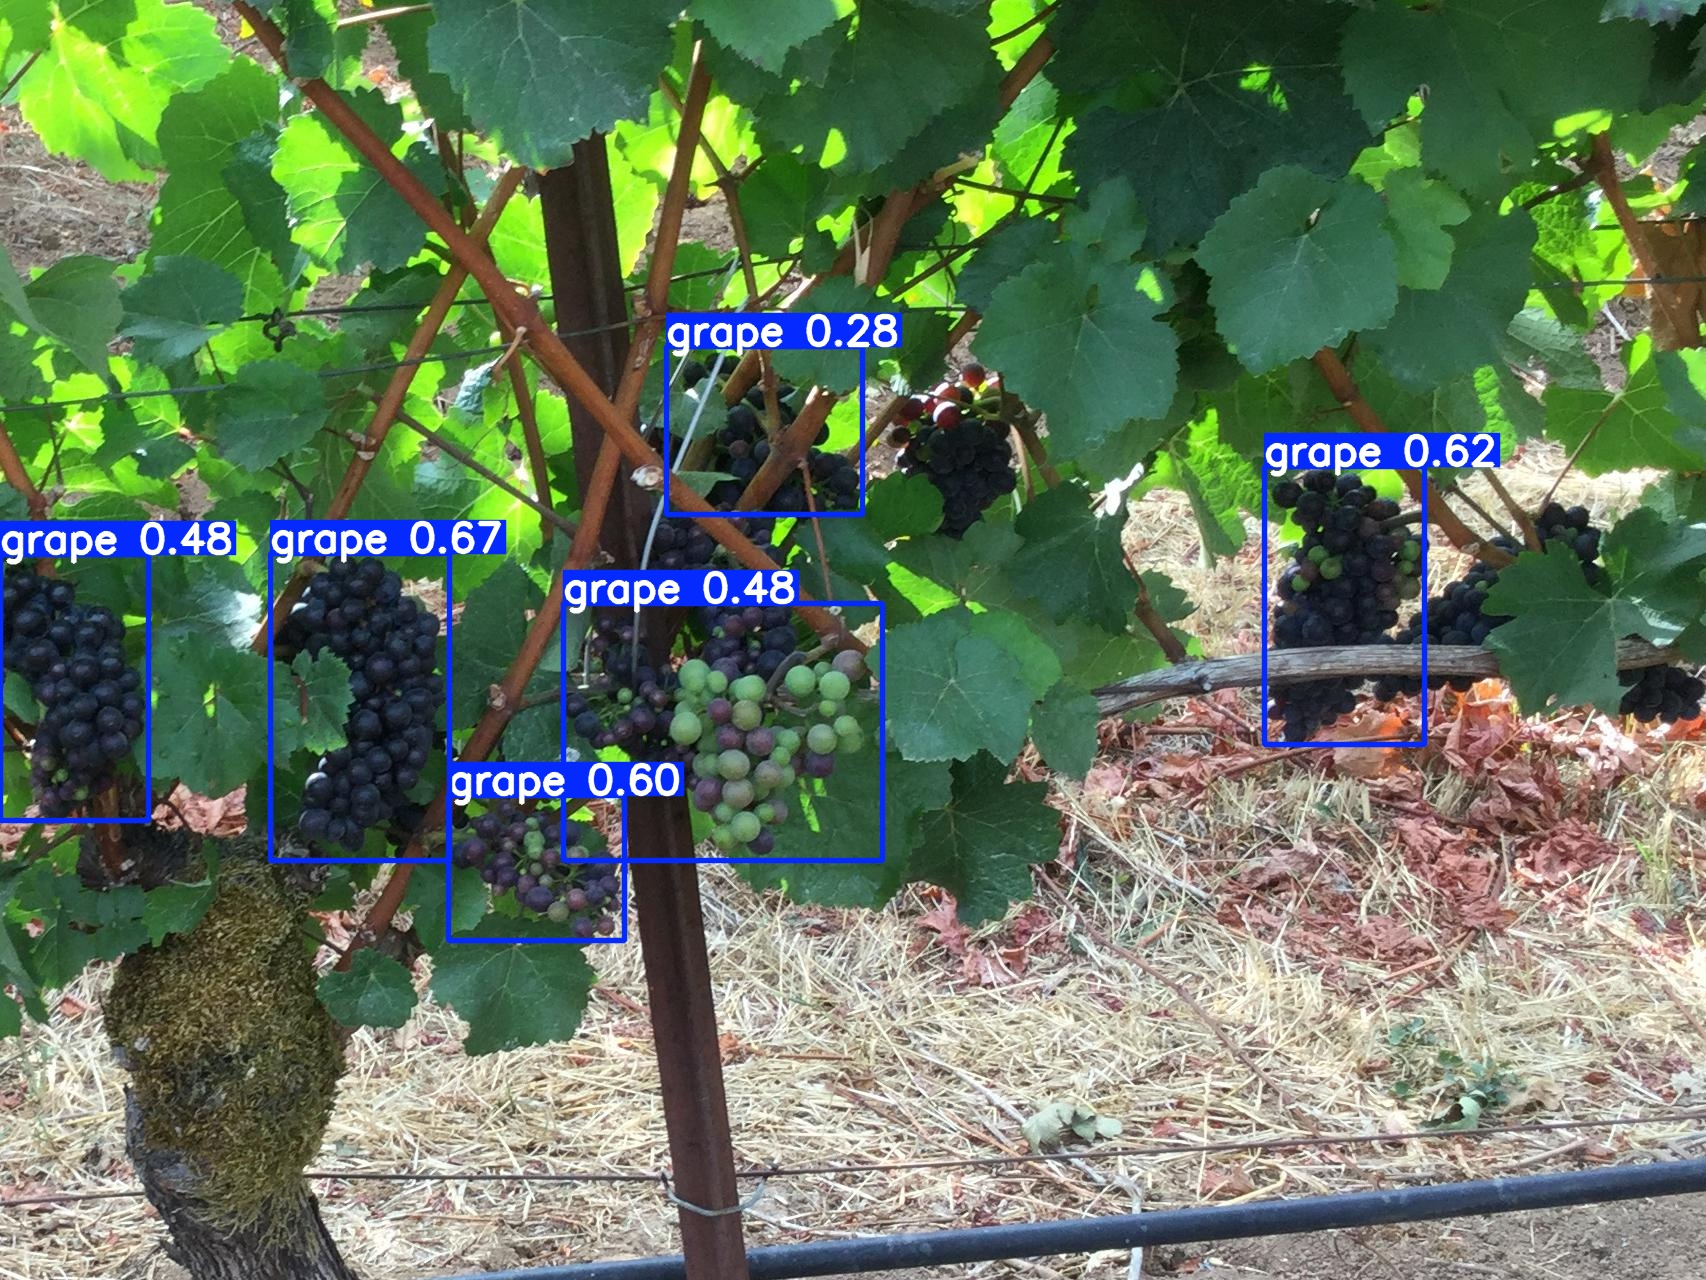

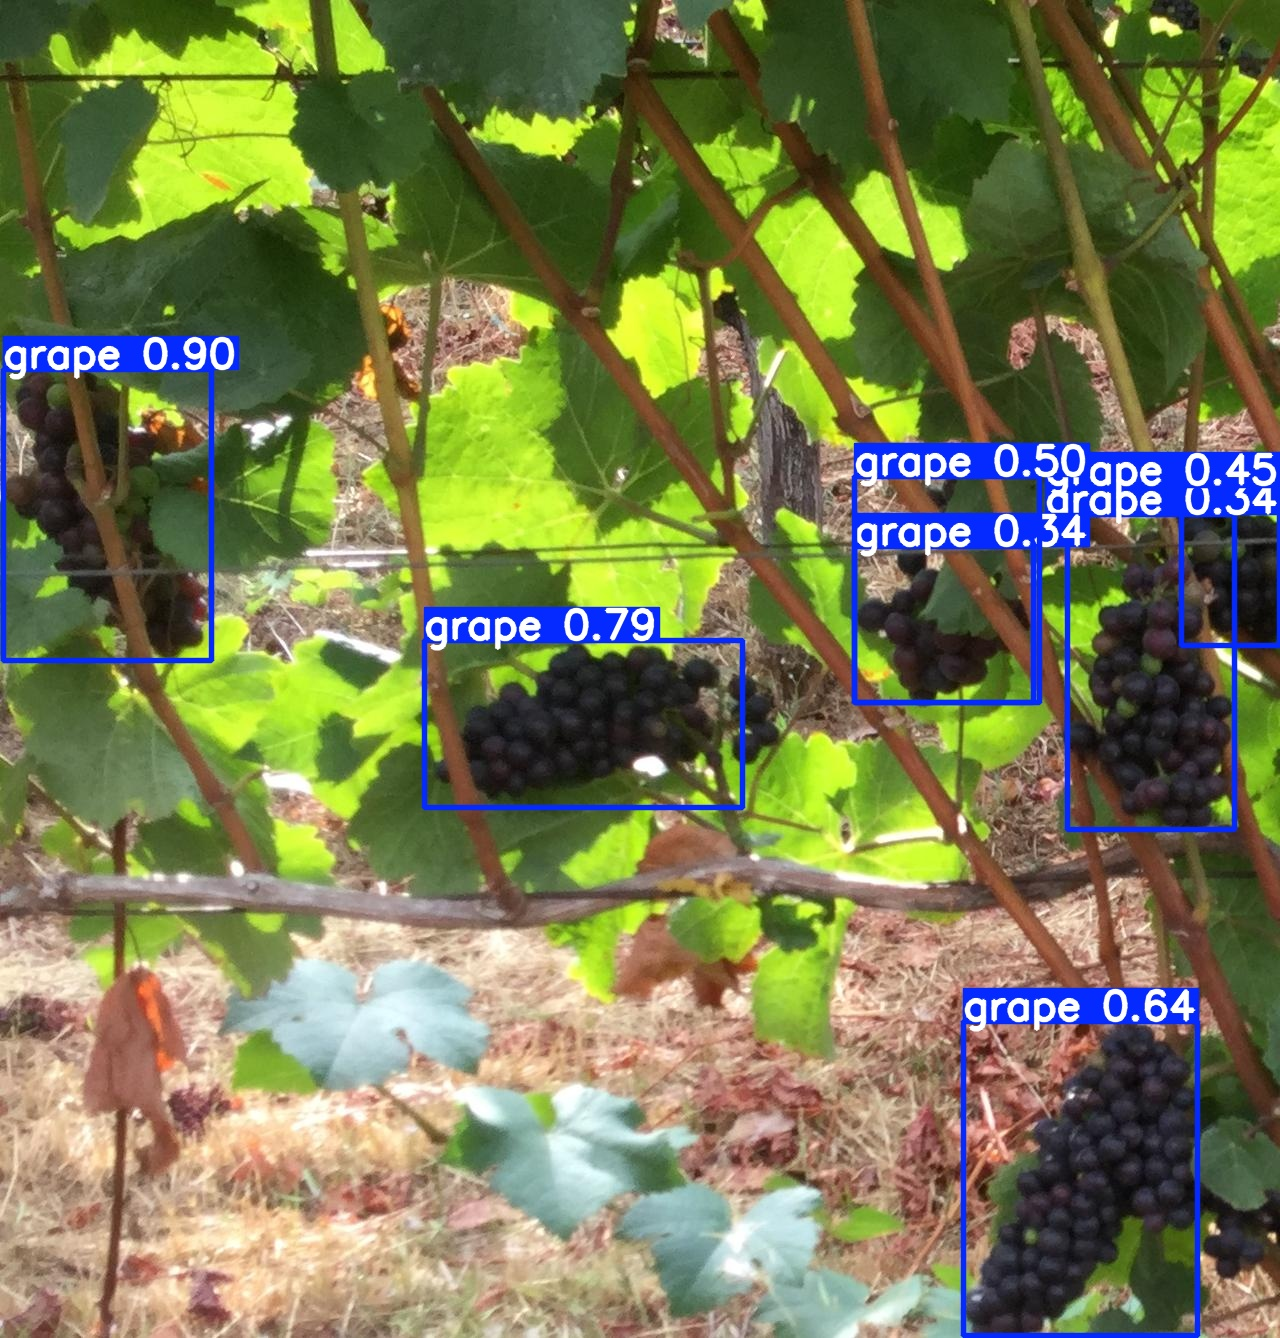

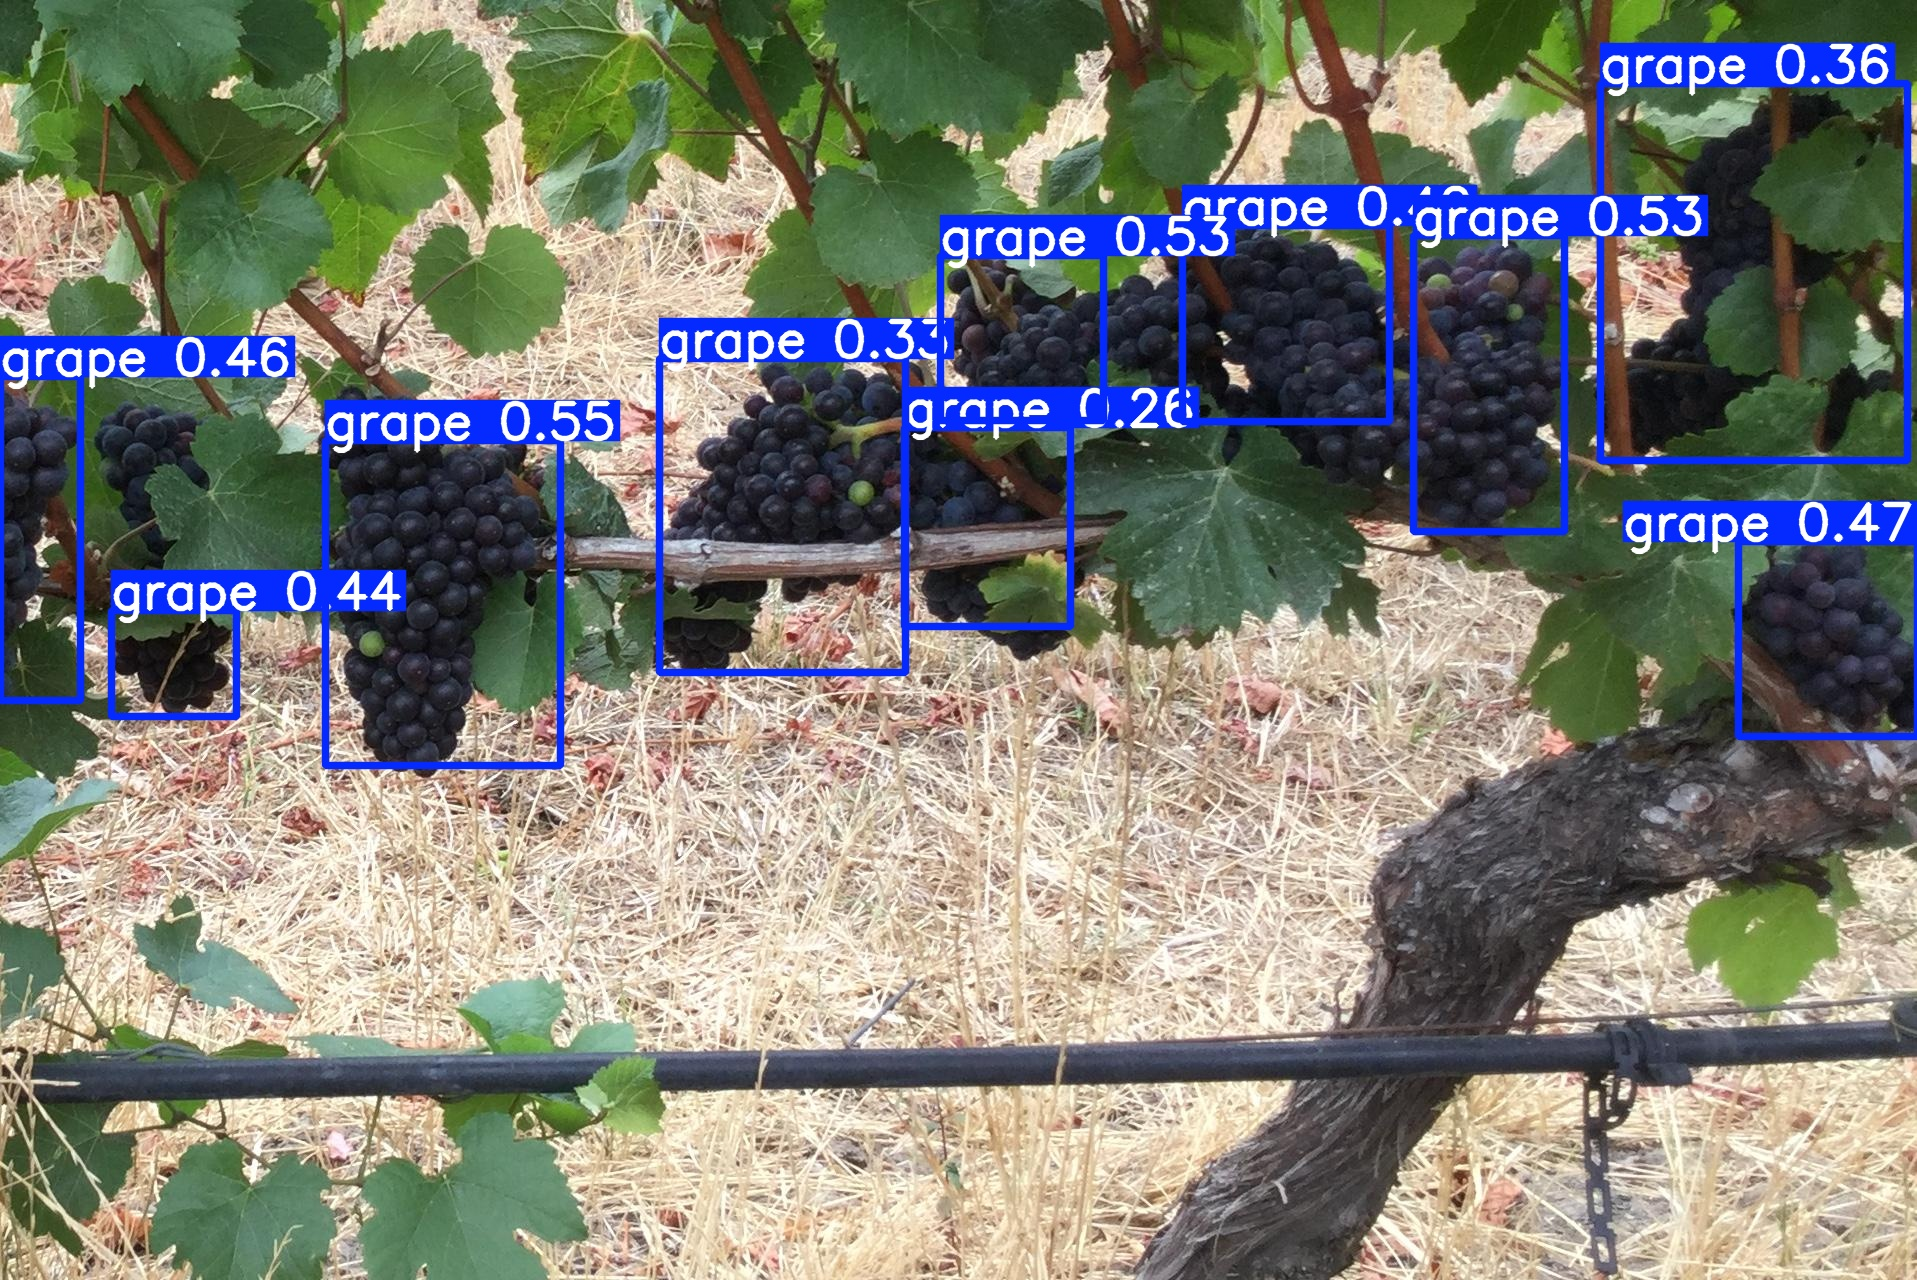

In [ ]:
# display images
from IPython.display import display,Image
from glob import glob
import os
imge_paths = glob('/content/runs/detect/predict/*.jpg')[:20]
for image_path in imge_paths:
  display(Image(filename=image_path))
  print('\n')


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source=/content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4 save=True

Ultralytics 8.3.26 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 143.1ms
video 1/1 (frame 2/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 125.7ms
video 1/1 (frame 3/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 141.7ms
video 1/1 (frame 4/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 205.3ms
video 1/1 (frame 5/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 170.9ms
video 1/1 (frame 6/433) /content/dataset_directory/Grapes/Grapes/videos/grape_video_pan_in_out.mp4: 384x640 (no detections), 169.8ms
video 1/1 (frame 7/433) /content/datase